In [5]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/ntsb_processed/master_train.csv')

In [12]:
datetime_format = '%m/%d/%y %H:%M:%S'

df['insp_date'] = pd.to_datetime(
    df['date_last_insp'].replace('other/unknown', np.nan),
    format=datetime_format, errors='coerce'
    )

df['event_date'] = pd.to_datetime(
        df['ev_date'],
        format=datetime_format, errors='coerce'
        )
df['days_since_insp'] = (df['event_date'] - df['insp_date']).dt.days


In [16]:
print('blank proportion of days_since_insp:',np.sum(df['days_since_insp'].isna())/len(df))

blank proportion of days_since_insp: 0.1981107826757486


In [31]:
df['acft_prop_inj_n'] =  df['acft_none_count'] / df['acft_total_person_count']
df['acft_prop_inj_m'] =  df['acft_minor_count'] / df['acft_total_person_count']
df['acft_prop_inj_s'] =  df['acft_serious_count'] / df['acft_total_person_count']
df['acft_prop_inj_f'] =  df['acft_fatal_count'] / df['acft_total_person_count']

In [39]:
none_days = df[df['days_since_insp'].isna()]
neg_days = df[df['days_since_insp']<0]
zero_days = df[df['days_since_insp']==0]
pos_days = df[df['days_since_insp']>0]


In [35]:
import matplotlib.pyplot as plt


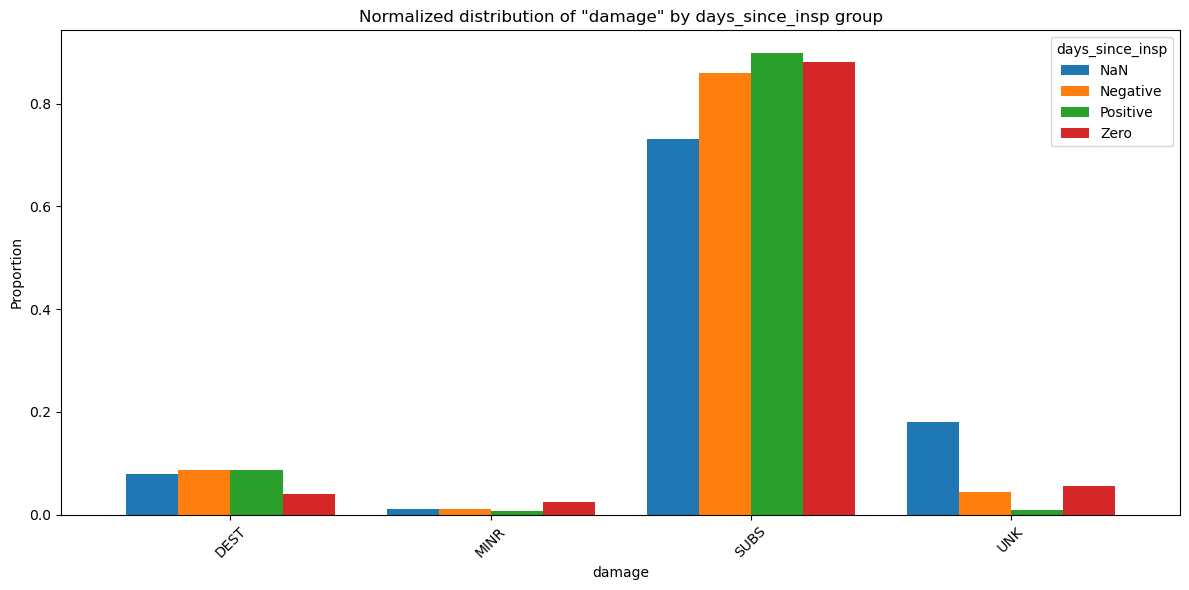

In [41]:
column = 'damage'
# Assign group labels
none_days = none_days.assign(group='NaN')
neg_days = neg_days.assign(group='Negative')
zero_days = zero_days.assign(group='Zero')
pos_days = pos_days.assign(group='Positive')

# Combine into one DataFrame
combined = pd.concat([none_days, neg_days, zero_days, pos_days])

# Count values per group/category
counts = combined.groupby(['group', column]).size().unstack(fill_value=0)

# Normalize: divide each row by its row sum
normalized = counts.div(counts.sum(axis=1), axis=0)

# Plot normalized grouped bar chart
normalized.T.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title(f'Normalized distribution of "{column}" by days_since_insp group')
plt.ylabel('Proportion')
plt.xlabel(column)
plt.xticks(rotation=45)
plt.legend(title='days_since_insp')
plt.tight_layout()
plt.show()

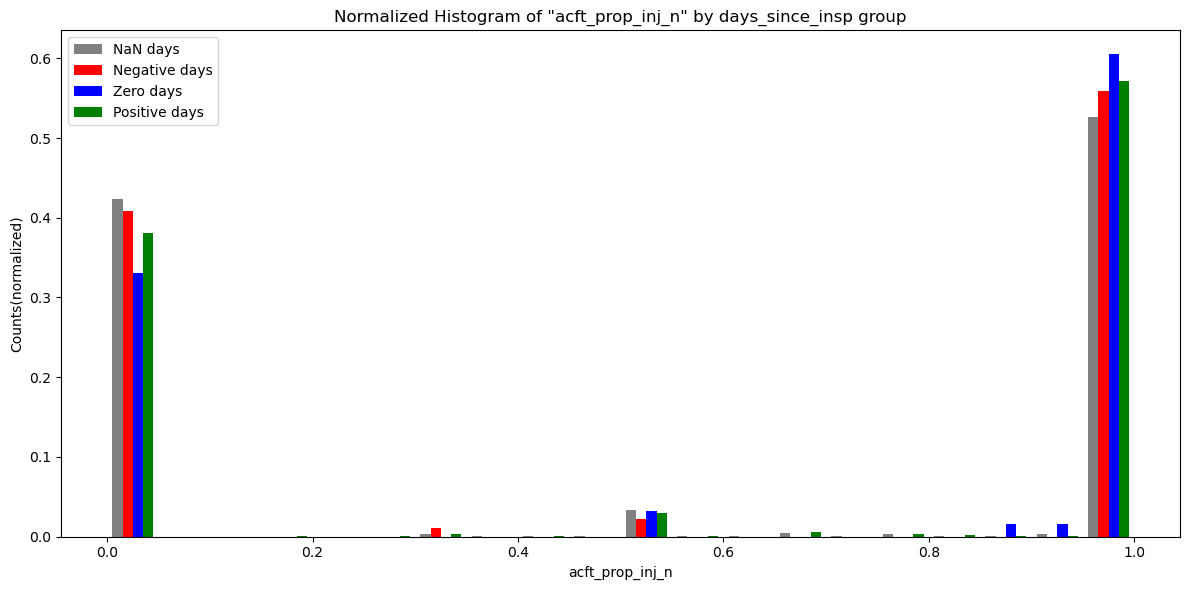

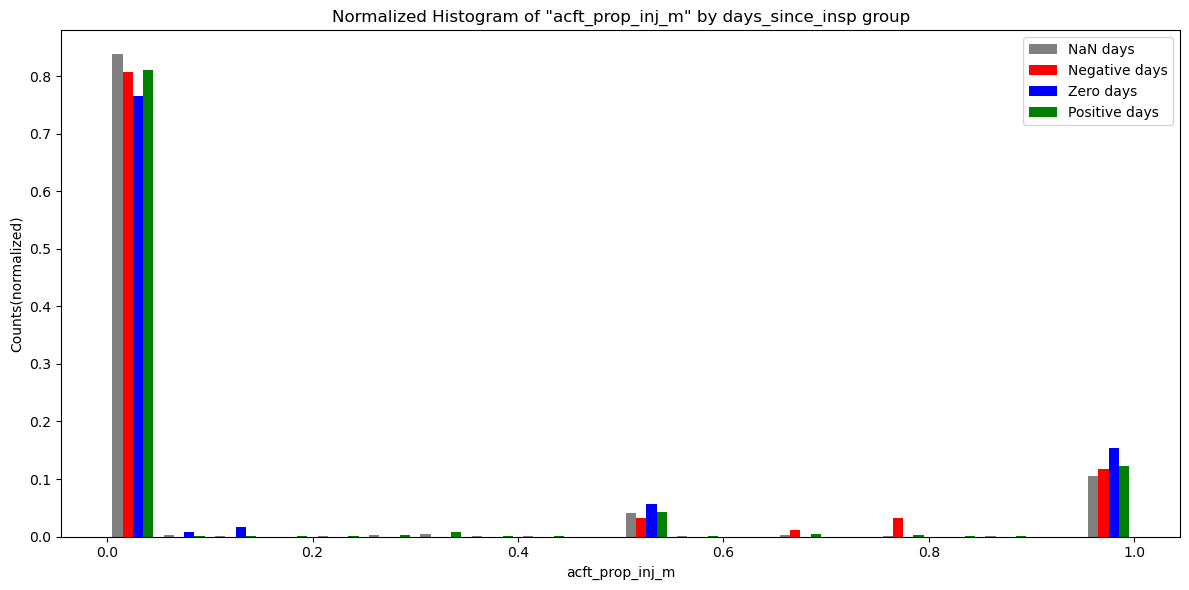

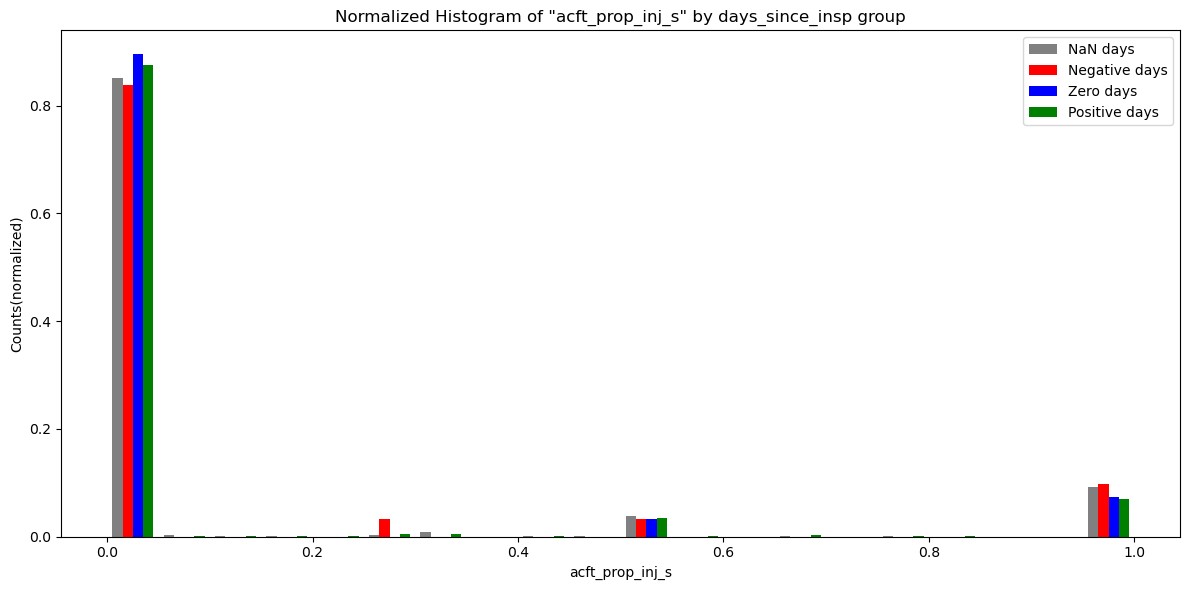

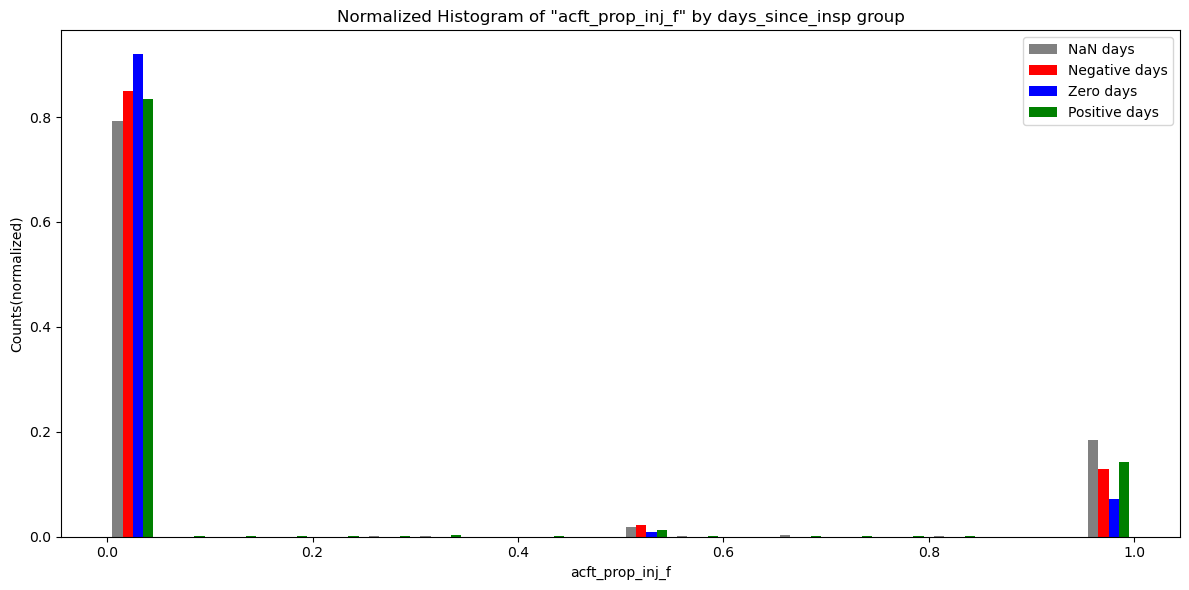

In [50]:
for column in ['acft_prop_inj_n','acft_prop_inj_m','acft_prop_inj_s','acft_prop_inj_f']:
    # Ensure the column is numeric
    none_vals = pd.to_numeric(none_days[column], errors='coerce').dropna()
    neg_vals = pd.to_numeric(neg_days[column], errors='coerce').dropna()
    zero_vals = pd.to_numeric(zero_days[column], errors='coerce').dropna()
    pos_vals = pd.to_numeric(pos_days[column], errors='coerce').dropna()

    # Define common bins
    bins = np.linspace(0, 1, 21)  # 20 bins from 0 to 1
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    width = (bins[1] - bins[0]) / 5  # Narrow width for 4 groups

    # Get normalized histogram counts (density=True)
    neg_counts, _ = np.histogram(neg_vals, bins=bins, density=False)
    zero_counts, _ = np.histogram(zero_vals, bins=bins, density=False)
    pos_counts, _ = np.histogram(pos_vals, bins=bins, density=False)
    none_counts, _ = np.histogram(none_vals, bins=bins, density=False)
    none_counts = none_counts / none_counts.sum()
    zero_counts = zero_counts / zero_counts.sum()
    pos_counts = pos_counts / pos_counts.sum()
    neg_counts = neg_counts / neg_counts.sum()
    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(bin_centers - 1.5*width, none_counts, width=width, label='NaN days', color='gray')
    plt.bar(bin_centers - 0.5*width, neg_counts, width=width, label='Negative days', color='red')
    plt.bar(bin_centers + 0.5*width, zero_counts, width=width, label='Zero days', color='blue')
    plt.bar(bin_centers + 1.5*width, pos_counts, width=width, label='Positive days', color='green')

    plt.xlabel(column)
    plt.ylabel('Counts(normalized)')
    plt.title(f'Normalized Histogram of "{column}" by days_since_insp group')
    plt.legend()
    plt.tight_layout()
    plt.show()